In [6]:
import numpy as np

n = int(input('Введите размер массива n= '))
X=np.zeros((n,n),int)
print('\n')
array = np.zeros((n,n),int)
i = n-1#строка
j = n-2#столбец
cnt = 1#шаг
array[n-1,n-1]=1

while cnt <= (n)**(2)-1:
    array[i][j] = cnt
    # шаг вправо
    if i<j+1 and i+j<n-1: 
        j+= 1
    # шаг влево
    elif i>=j and i+j>n-1 : 
        j-= 1
    # шаг вниз
    elif i<j and i+j>=n-1 and array[i+1,j] == 0 :
        i+= 1
    # шаг вверх
    elif array[i-1,j] == 0 :
        i-= 1
    # шаг в конце i-ого винта спирали,выход из правого нижнего угла-влево
    else:
        j-= 1
    cnt += 1
    
array[n-1,n-1]=0 
print(array)

#for i in array:
    #for j in i:
        #print(j,end='  ')
    #print('\n')


Введите размер массива n= 10


[[18 19 20 21 22 23 24 25 26 27]
 [17 50 51 52 53 54 55 56 57 28]
 [16 49 74 75 76 77 78 79 58 29]
 [15 48 73 90 91 92 93 80 59 30]
 [14 47 72 89 98 99 94 81 60 31]
 [13 46 71 88 97 96 95 82 61 32]
 [12 45 70 87 86 85 84 83 62 33]
 [11 44 69 68 67 66 65 64 63 34]
 [10 43 42 41 40 39 38 37 36 35]
 [ 9  8  7  6  5  4  3  2  1  0]]


Исключение элементов на главной диагонали:
 [[ 0 19 20 21 22 23 24 25 26 27]
 [17  0 51 52 53 54 55 56 57 28]
 [16 49  0 75 76 77 78 79 58 29]
 [15 48 73  0 91 92 93 80 59 30]
 [14 47 72 89  0 99 94 81 60 31]
 [13 46 71 88 97  0 95 82 61 32]
 [12 45 70 87 86 85  0 83 62 33]
 [11 44 69 68 67 66 65  0 63 34]
 [10 43 42 41 40 39 38 37  0 35]
 [ 9  8  7  6  5  4  3  2  1  0]]

Замена 10% элементов:
 [[ 0 19 20  0 22 23 24 25 26 27]
 [17  0  0 52 53 54 55 56 57 28]
 [16  0  0  0 76 77  0 79 58 29]
 [15 48 73  0 91 92  0 80 59 30]
 [14 47 72 89  0 99 94 81 60 31]
 [13 46 71 88 97  0 95 82 61 32]
 [12  0 70 87 86 85  0 83 62 33]
 [11 44 69 68 67 66 65  0 63 34]
 [10 43 42 41 40 39 38 37  0 35]
 [ 0  8  7  6  5  4  3  2  1  0]]


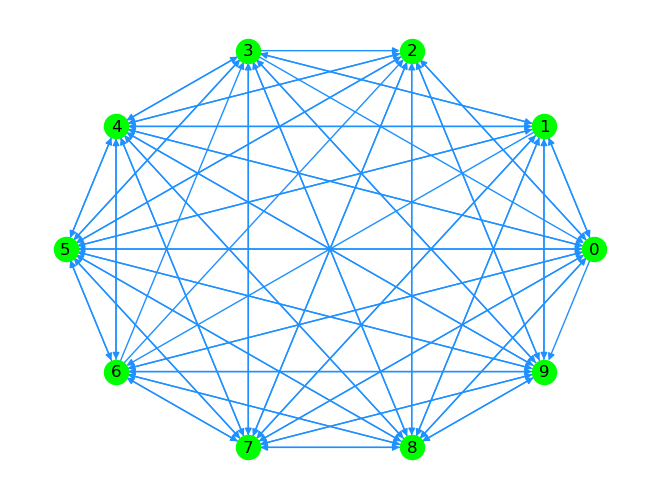

Введите начальную точку пути в графе  по х = 1
Введите начальную точку пути в графе по у= 2
Введите конечную точку пути в графе по х  = 3
Введите конечную точку пути в графе по у = 5

Путь по координатам : [(1, 2), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5)]

Стоимость пути : 274


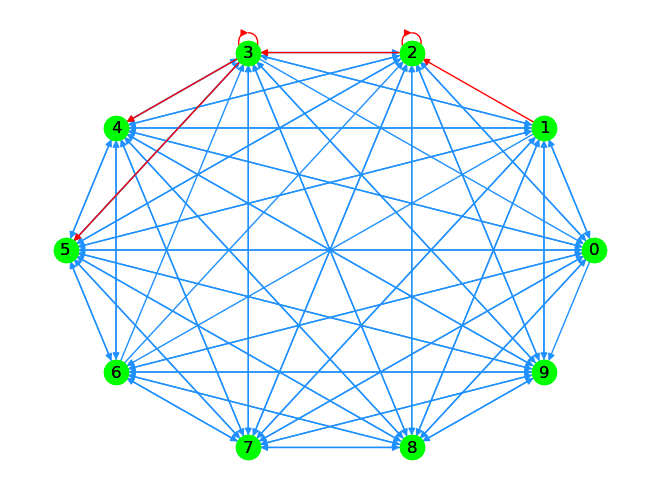

In [7]:
import random
import matplotlib.pyplot as plt
import networkx as nx

for i in range(n):
    array[i,i] = 0
print('Исключение элементов на главной диагонали:\n',array)

#10% от 100 = 10 элементов
cnt=0
while cnt != n:
    i = random.randint(0,n-1)
    j = random.randint(0,n-1)
    if i != j:
        array[i,j] = 0
        cnt += 1
print('\nЗамена 10% элементов:\n',array)
G = nx.DiGraph(np.matrix(array))    
nx.draw(G, pos = nx.circular_layout(G), with_labels = True, node_size = 300, arrows = True,edge_color=('dodgerblue'),node_color = 'lime')
plt.show()

x_start = int(input('Введите начальную точку пути в графе  по х = '))
y_start = int(input('Введите начальную точку пути в графе по у= '))

x_end = int(input('Введите конечную точку пути в графе по х  = '))
y_end = int(input('Введите конечную точку пути в графе по у = '))

start = (x_start, y_start)
end = (x_end, y_end)


def Minti (MAP, start, end):
    
    queue = [(0, start)] # список из стоимости и рассматриваемой координаты шага
    visit_vertex ={}
    visit_vertex [ start ] = (0, start) # словарь посещенных вершин с стоимостью и рассматриваеомй координатой
    
    visit_vertex = get_visit_vertex ( MAP, queue, visit_vertex, end )
    path = restore_path (None, visit_vertex, start, end )
        
    return path[0], path[1] # путь и цена

    
def get_visit_vertex ( MAP, queue, visit_vertex, end ):
    
    while queue:
        
        queue.sort(reverse = True) # сортируем список от максимальной к минимальной стоимости
        basic_vertex = queue.pop()[1] # вытаскиваем вершину с минимальной стоимостью 

        if basic_vertex == end: # если рассматриваемая вершина является конечной , то дальше рассматривать вершины не будем
            break
            
        get_step = make_step( MAP, basic_vertex, visit_vertex, queue, end)
        visit_vertex = get_step[0]
        queue = get_step[1]
        
    return visit_vertex 
 
    
def make_step( MAP, basic_vertex, visit_vertex, queue, end): 
    
    coords_one_step = [ ( 0 , -1 ),( 1 , 0 ),( 0 , 1 ),( -1 , 0 ) ]
    
    for x_step, y_step in coords_one_step:
 
        x, y = basic_vertex[0] + x_step, basic_vertex[1] + y_step # координаты соседних вершин
        
        if 0 <= x < len (MAP) and 0 <= y < len (MAP) and MAP[x][y] != -1: # если не вышли за массив и не стена
                
                new_cost = visit_vertex[basic_vertex][0] + MAP[x][y]
                
                if visit_vertex.get((x, y)) == None or new_cost < visit_vertex[(x,y)][0]: # если не рассматривали 
                                                                                     # или новая цена будет ниже чем имеется
                    queue.append( (new_cost, (x, y)) ) # добавляем цену и соседнию вершину
                
                    visit_vertex[(x, y)] = (new_cost, basic_vertex)
           
    return visit_vertex, queue

def restore_path ( visit_vertex, grades_visit_vertex , start , end ):
    
    path = [] 
    coord = end
    grade = 0
    # путь восстанавливаем с конца  до начала
    while coord != start:
        
        path.append(coord)
         # переприсваиваем ключ значением смежной вершины из словаря 
         # ключи не повтаряются , но разные ключи могут содержать одинаковые вершины
         # т.е. по одному ключу соответствует одна смежная вершина из которой мы пришли
        grade += grades_visit_vertex[coord][0]
        coord = grades_visit_vertex[coord][1]
                
    path.append(start)    
    path.reverse()
    
    return path, grade

Result = Minti (array, start, end)

print('\nПуть по координатам :',Result[0])
print('\nСтоимость пути :', Result[1])
path = np.zeros((n,n))

for i in Result[0]:
    path[i[0]][i[1]] = 1


G = nx.DiGraph(np.matrix(array))
M = nx.DiGraph(np.matrix(path))
nx.draw(G, pos = nx.circular_layout(G), with_labels = True, node_size = 300, arrows = True,edge_color=('dodgerblue'),node_color = 'lime')
nx.draw(M, pos = nx.circular_layout(M), with_labels = True, node_size = 300, arrows = True,edge_color=('red'),node_color = 'lime')
plt.show()
